In [14]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
# Reading the datasets

df_avocado = pd.read_csv("datasets/avocado.csv", index_col =0)
df_avocado.rename(columns={'AveragePrice': 'price'}, inplace=True)
df_avocado = df_avocado.reset_index(drop=True)

df_diamonds = pd.read_csv("datasets/diamonds.csv", index_col =0)

df_brooklyn = pd.read_csv("datasets/brooklyn_sales_map.csv", index_col =0, low_memory=False)
df_brooklyn.rename(columns={'sale_price': 'price'}, inplace=True)
df_brooklyn=df_brooklyn.drop('easement', axis=1)

In [43]:
# Plotting the box plot of varibles with target on y axis to see the relation of categorical variable with dependent variable
# ANOVA to check if there is a significant difference in y w.r.t among the categorical variable

def box_plot(df, x, y, fig_size=(5,5)):
    mod = ols(f'{y} ~ {x}',
                    data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    p_value = aov_table['PR(>F)'][0]
    if p_value < 0.05:
        print(f'There is a significant difference in among {x} for variable {y}')
    else:
        print(f'There is NO significant difference in among {x} for variable {y}')
    
    df.boxplot(column=y, by=x, rot=90, figsize=fig_size)

There is a significant difference in among region for variable price


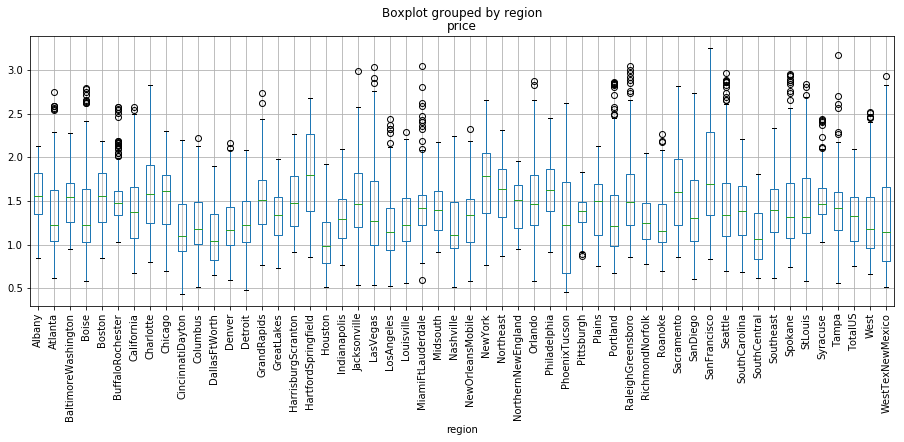

In [44]:
box_plot(df=df_avocado, x='region', y='price', fig_size=(15,5))

There is a significant difference in among cut for variable price


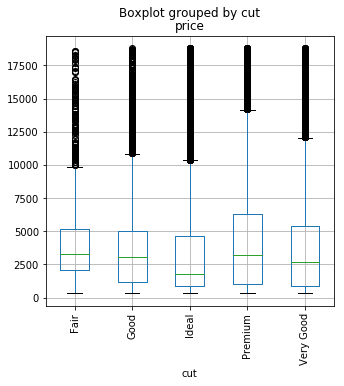

In [45]:
box_plot(df=df_diamonds, x='cut', y='price')

There is a significant difference in among color for variable price


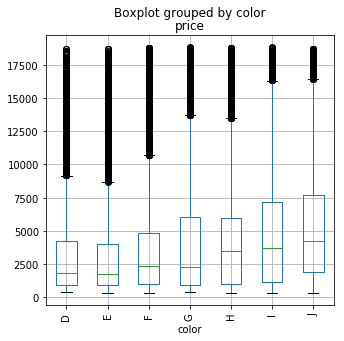

In [46]:
box_plot(df=df_diamonds, x='color', y='price')

There is a significant difference in among clarity for variable price


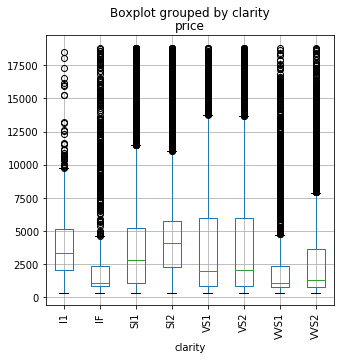

In [47]:
box_plot(df=df_diamonds, x='clarity', y='price')

There is a significant difference in among neighborhood for variable price


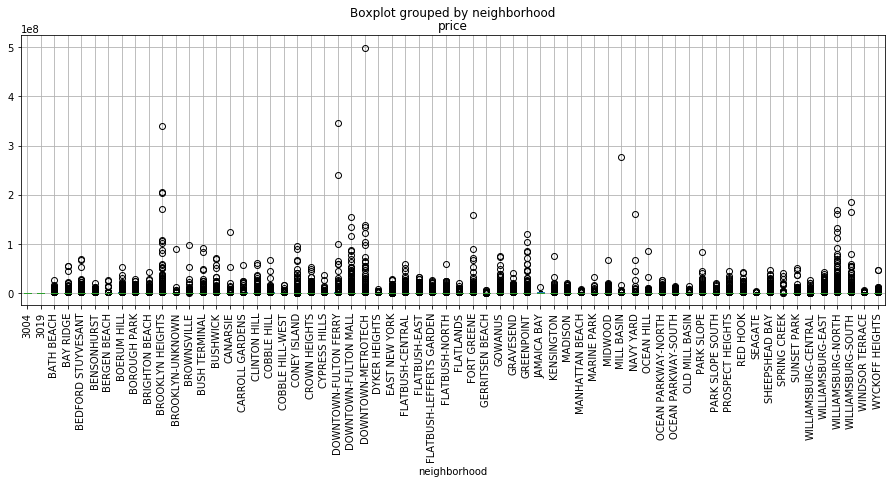

In [48]:
box_plot(df=df_brooklyn, x='neighborhood', y='price', fig_size=(15,5))

There is a significant difference in among building_class_category for variable price


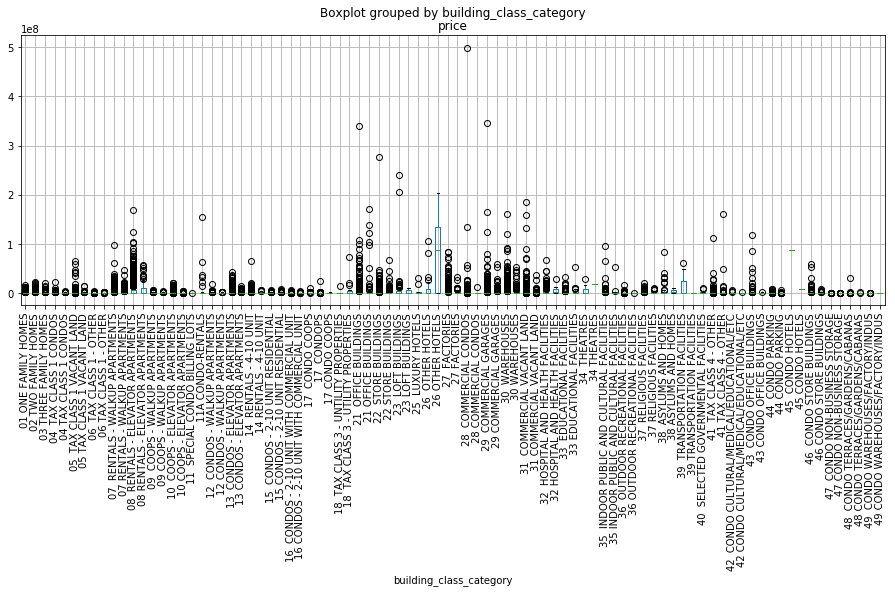

In [153]:
box_plot(df=df_brooklyn, x='building_class_category', y='price', fig_size=(15,5))

There is a significant difference in among tax_class for variable price


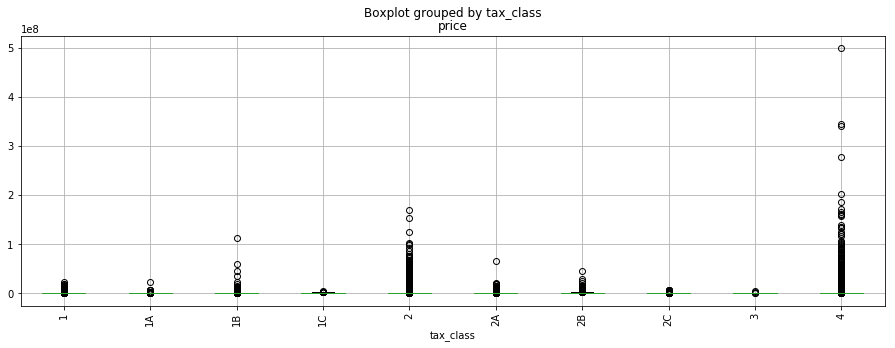

In [154]:
box_plot(df=df_brooklyn, x='tax_class', y='price', fig_size=(15,5))

There is a significant difference in among SanitSub for variable price


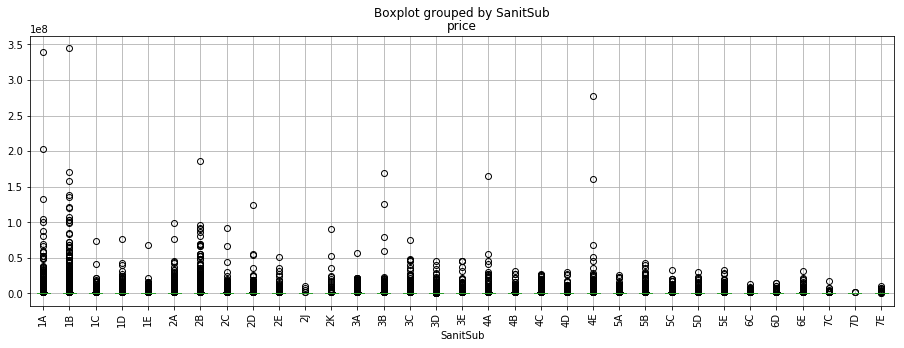

In [155]:
box_plot(df=df_brooklyn, x='SanitSub', y='price', fig_size=(15,5))

In [24]:
df = pd.read_csv("datasets/final_result.csv", index_col =0)

In [25]:
def plot(df, x, y, hue, model):
    
    ax = sns.pointplot(x=x, y=y, hue=hue, 
                  data=df[df['model']==model])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='encoder')
    plt.title(f'Performance of encoders for {model}')


In [26]:
def _get_sorted_data(df, model, col, metric):
    return df[(df['model']==model) & (df['column']==col)].sort_values(by=metric)

### Plotting for all the variables
There are two metrics that we analysze:
* RMSE
* MAE

And we alanyse them across different models:
* Linear Model: Linear Regression
* Tree based model: Random Forest

Label Encoder should never be used unless we have an Ordinal Variable because of it's performance as compared to other encoders, hence we can remove it from the analysis

To improve the visualization, we divide the dataset into 3 sets based on the cardinality

In [49]:
low_cardinality = df[df['cardinality']<=10].reset_index(drop = True)
medium_cardinality = df[(df['cardinality']>10) & (df['cardinality']<=200)].reset_index(drop = True)
high_cardinality = df[df['cardinality']>200].reset_index(drop = True)

## Low Cardinality

### Linear Model

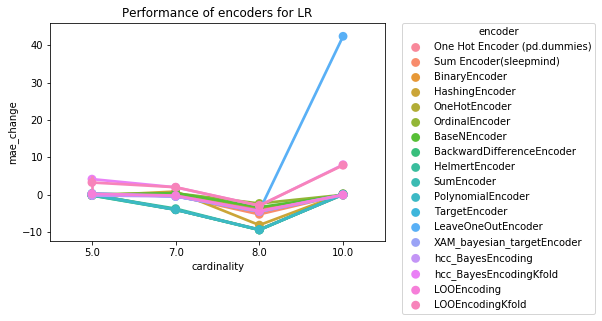

In [51]:
plot(df=low_cardinality, x ="cardinality", y="mae_change", hue='encoder', model='LR')

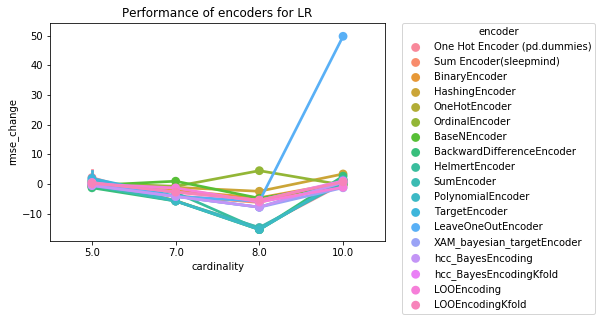

In [52]:
plot(df=low_cardinality, x ="cardinality", y="rmse_change", hue='encoder', model='LR')

In [53]:
low_cardinality[['column','cardinality']].drop_duplicates()

,column,cardinality
0,cut,5.0
18,color,7.0
36,clarity,8.0
108,tax_class,10.0
126,OwnerType,5.0


In [63]:
_get_sorted_data(df=low_cardinality, model='LR', col='color', metric='mae')

,n_rows,n_cols,cardinality,model,column,encoder,rmse,mae,fit_time,rmse_change,mae_change,fit_time_change
27,53940,10,7.0,LR,color,SumEncoder,1412.968207,853.598337,0.084538,-5.746888,-4.087058,468.945576
25,53940,10,7.0,LR,color,BackwardDifferenceEncoder,1413.129566,853.722507,0.084879,-5.736125,-4.073106,471.236895
28,53940,10,7.0,LR,color,PolynomialEncoder,1413.482134,853.747217,0.084505,-5.712607,-4.070329,468.721258
18,53940,10,7.0,LR,color,One Hot Encoder (pd.dummies),1413.289706,853.862255,0.022237,-5.725443,-4.057403,49.658388
22,53940,10,7.0,LR,color,OneHotEncoder,1415.287573,853.977528,0.083799,-5.592173,-4.044451,463.969180
26,53940,10,7.0,LR,color,HelmertEncoder,1455.704134,856.378288,0.084569,-2.896156,-3.774694,469.148714
32,53940,10,7.0,LR,color,hcc_BayesEncoding,1436.144819,885.562102,0.058643,-4.200875,-0.495511,294.668673
31,53940,10,7.0,LR,color,XAM_bayesian_targetEncoder,1436.288893,885.578365,0.041881,-4.191264,-0.493683,181.861680
29,53940,10,7.0,LR,color,TargetEncoder,1437.331311,885.620788,0.081851,-4.121729,-0.488917,450.860528
30,53940,10,7.0,LR,color,LeaveOneOutEncoder,1436.656201,885.828002,0.102971,-4.166763,-0.465633,593.000889


The trends for both the metrics is approximately same for Linear Models for low cardinality.
It can be seen that with low cardinality, following models works the best in no particular order:

1. SumEncoder
2. BackwardDifferenceEncoder
3. PolynomialEncoder
4. One Hot Encoder (pd.dummies)
5. HelmertEncoder

XAM_bayesian_targetEncoder, TargetEncoder, hcc_BayesEncoding, Sum Encoder(sleepmind), LOOE Encoding works very similar in terms of accuracy. Sum Encoder(sleepmind) is slow as compared to other encoders.

### Tree Based Model

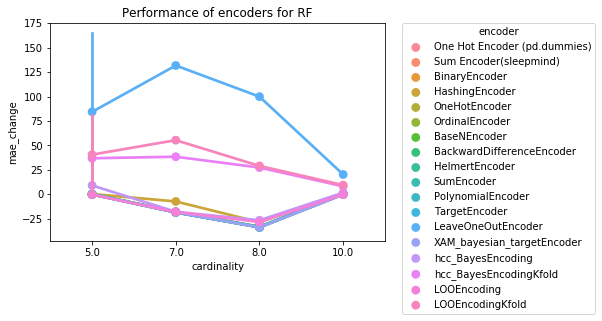

In [64]:
plot(df=low_cardinality, x ="cardinality", y="mae_change", hue='encoder', model='RF')

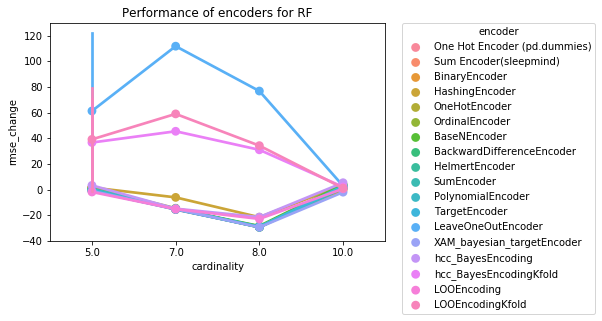

In [74]:
plot(df=low_cardinality, x ="cardinality", y="rmse_change", hue='encoder', model='RF')

In [75]:
_get_sorted_data(df=low_cardinality, model='RF', col='clarity', metric='rmse')

,n_rows,n_cols,cardinality,model,column,encoder,rmse,mae,fit_time,rmse_change,mae_change,fit_time_change
98,53940,10,8.0,RF,clarity,HelmertEncoder,990.597220,526.584139,2.651512,-29.450469,-33.807348,28.314966
103,53940,10,8.0,RF,clarity,XAM_bayesian_targetEncoder,990.633315,526.760549,2.292706,-29.447899,-33.785173,10.951226
94,53940,10,8.0,RF,clarity,OneHotEncoder,990.810890,527.114607,2.743583,-29.435252,-33.740667,32.770582
91,53940,10,8.0,RF,clarity,Sum Encoder(sleepmind),992.837803,526.295342,2.403721,-29.290897,-33.843650,16.323575
97,53940,10,8.0,RF,clarity,BackwardDifferenceEncoder,993.030028,527.663683,2.382765,-29.277207,-33.671647,15.309474
100,53940,10,8.0,RF,clarity,PolynomialEncoder,993.691322,527.418359,2.580245,-29.230110,-33.702485,24.866115
101,53940,10,8.0,RF,clarity,TargetEncoder,994.076184,527.944197,2.322257,-29.202700,-33.636386,12.381275
95,53940,10,8.0,RF,clarity,OrdinalEncoder,994.258458,527.281956,2.405724,-29.189719,-33.719631,16.420516
90,53940,10,8.0,RF,clarity,One Hot Encoder (pd.dummies),995.571288,527.926788,2.482075,-29.096220,-33.638574,20.115357
99,53940,10,8.0,RF,clarity,SumEncoder,1000.110736,528.945473,2.453176,-28.772924,-33.510524,18.716863


The trends for both the metrics is approximately same for Tree Based Models for low cardinality.
It can be seen that with low cardinality, following models works the best in no particular order:

1. HelmertEncoder
2. One Hot Encoder (pd.dummies)
3. TargetEncoder
4. Sum Encoder(sleepmind)
5. OrdinalEncoder
6. XAM_bayesian_targetEncoder


XAM_bayesian_targetEncoder should be preferred with Tree Based Models and low cardinality, since the run time is really low.

## Medium Cardinality

### Linear Models

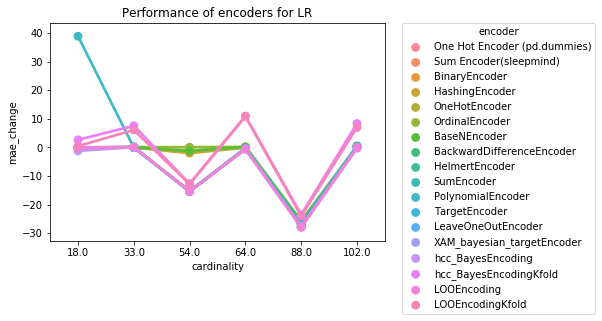

In [36]:
plot(df=medium_cardinality, x ="cardinality", y="mae_change", hue='encoder', model='LR')

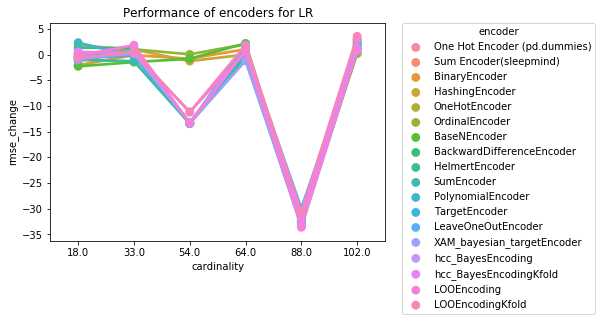

In [37]:
plot(df=medium_cardinality, x ="cardinality", y="rmse_change", hue='encoder', model='LR')

In [38]:
medium_cardinality[['column','cardinality']].drop_duplicates()

,column,cardinality
0,region,54.0
36,neighborhood,64.0
54,building_class_category,88.0
72,FireComp,102.0
90,SanitSub,33.0
108,SPDist1,18.0


In [82]:
_get_sorted_data(df=medium_cardinality, model='LR', col='region', metric='rmse')

,n_rows,n_cols,cardinality,model,column,encoder,rmse,mae,fit_time,rmse_change,mae_change,fit_time_change
8,18249,12,54.0,LR,region,HelmertEncoder,0.268501,0.201221,0.227639,-13.442470,-15.398796,1127.552469
9,18249,12,54.0,LR,region,SumEncoder,0.268546,0.201291,0.230901,-13.427840,-15.369278,1145.143971
10,18249,12,54.0,LR,region,PolynomialEncoder,0.268559,0.201276,0.211559,-13.423672,-15.375818,1040.844386
13,18249,12,54.0,LR,region,XAM_bayesian_targetEncoder,0.268711,0.201312,0.027180,-13.374787,-15.360499,46.572109
4,18249,12,54.0,LR,region,OneHotEncoder,0.268736,0.201391,0.211986,-13.366738,-15.327138,1043.146018
16,18249,12,54.0,LR,region,LOOEncoding,0.268743,0.201286,0.047971,-13.364430,-15.371609,158.687111
7,18249,12,54.0,LR,region,BackwardDifferenceEncoder,0.268765,0.201400,0.203860,-13.357287,-15.323320,999.327587
0,18249,12,54.0,LR,region,One Hot Encoder (pd.dummies),0.268776,0.201422,0.072539,-13.353679,-15.314323,291.171721
1,18249,12,54.0,LR,region,Sum Encoder(sleepmind),0.268887,0.201469,0.139987,-13.318091,-15.294580,654.884314
11,18249,12,54.0,LR,region,TargetEncoder,0.268984,0.201467,0.256451,-13.286520,-15.295544,1282.927400


The trends for both the metrics is approximately same for Linear Models for low cardinality.
It can be seen that with low cardinality, following models works the best in no particular order:

1. SumEncoder
2. BackwardDifferenceEncoder
3. PolynomialEncoder
4. OneHotEncoder
5. HelmertEncoder
6. XAM_bayesian_targetEncoder

The error reduced by these encoders is pretty much the same but XAM_bayesian_targetEncoder is much more efficient as compared to other competitors.

### Tree Based Model

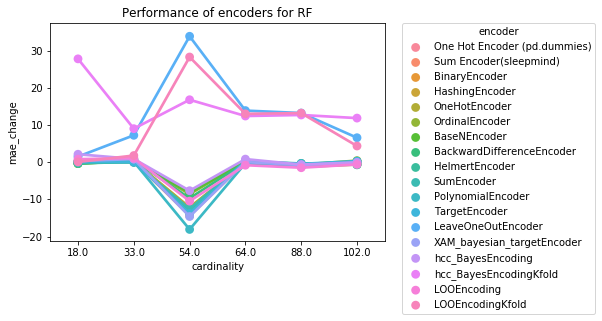

In [83]:
plot(df=medium_cardinality, x ="cardinality", y="mae_change", hue='encoder', model='RF')

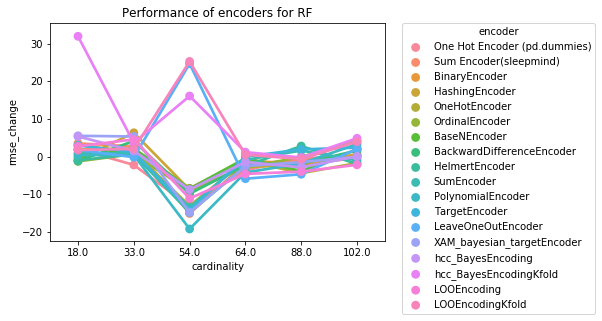

In [84]:
plot(df=medium_cardinality, x ="cardinality", y="rmse_change", hue='encoder', model='RF')

In [85]:
medium_cardinality[['column','cardinality']].drop_duplicates()

,column,cardinality
0,region,54.0
36,neighborhood,64.0
54,building_class_category,88.0
72,FireComp,102.0
90,SanitSub,33.0
108,SPDist1,18.0


In [88]:
_get_sorted_data(df=medium_cardinality, model='RF', col='region', metric='mae')

,n_rows,n_cols,cardinality,model,column,encoder,rmse,mae,fit_time,rmse_change,mae_change,fit_time_change
28,18249,12,54.0,RF,region,PolynomialEncoder,0.143697,0.100222,3.208503,-19.256069,-18.090924,133.883358
31,18249,12,54.0,RF,region,XAM_bayesian_targetEncoder,0.151512,0.104472,1.400176,-14.864915,-14.617954,2.065649
19,18249,12,54.0,RF,region,Sum Encoder(sleepmind),0.151026,0.104714,1.506645,-15.137933,-14.420097,9.826696
29,18249,12,54.0,RF,region,TargetEncoder,0.152440,0.105449,1.590952,-14.343490,-13.819607,15.972218
26,18249,12,54.0,RF,region,HelmertEncoder,0.151498,0.106070,2.483424,-14.872667,-13.311662,81.028857
27,18249,12,54.0,RF,region,SumEncoder,0.153904,0.106957,2.051131,-13.521042,-12.586666,49.516882
18,18249,12,54.0,RF,region,One Hot Encoder (pd.dummies),0.154469,0.107306,1.874440,-13.203706,-12.301752,36.637002
22,18249,12,54.0,RF,region,OneHotEncoder,0.154651,0.107471,1.971543,-13.101130,-12.167301,43.715337
34,18249,12,54.0,RF,region,LOOEncoding,0.158140,0.109540,1.535771,-11.140837,-10.476226,11.949774
25,18249,12,54.0,RF,region,BackwardDifferenceEncoder,0.160337,0.110479,2.193489,-9.906524,-9.708967,59.894028


The trends for both the metrics is approximately same for Linear Models for low cardinality.
It can be seen that with low cardinality, following models works the best in no particular order:

1. PolynomialEncoder
2. Sum Encoder(sleepmind)

3. XAM_bayesian_targetEncoder
4. TargetEncoder
5. HelmertEncoder

The error reduced by these encoders is pretty much the same but XAM_bayesian_targetEncoder is much more efficient as compared to other competitors.

## High Cardinality

# Summary

One hot Encoder (pd.dummies) works best with low dimension data.

Label Encoder should not be used as it's performance is low in every case
Hashing Encoders seems to work fine in some cases but should never be used as it is extremely slow

The following encoders seems to work best in almost all the situations.

1. PolynomialEncoder
2. Sum Encoder(sleepmind)
3. XAM_bayesian_targetEncoder
4. TargetEncoder
5. HelmertEncoder

The difference between the accuracy is generally low, and hence XAM_bayesian_targetEncodershould be used as it is much fast.
Also, we can furnther optimize it by tuning the prior weights.

Label encoder is the worst performer and hence should never be used.
Hash encoding takes a lot of time to run and hence should be avoided.

Although, we advice to use the top 3-5 encoders, since it will be dependent on importance of each feature and it's distribution.
